## Peliminary Results

## Collecting data

In [11]:
import pandas as pd
import numpy as np 
import requests,json, pickle, glob
from datetime import datetime

In [12]:
# write a function that receive the range of dates
# and get the data from the folders
# and append to the dataframe

# oragon = pd.read_excel('https://query.data.world/s/tnmiycnhx4mu4777vps4nphqm4qeoh')
# oragon

# PATH = r'C:/Users/ktadesse/Google Drive/research/VACCINE/Research Direction/Napa Valley/2016/'

# df_rain = pd.read_csv(PATH + 'rainfall.csv', names=['dates', 'inches']) #, index_col='dates')
# df_stages = pd.read_csv(PATH+'stages.csv', names=['dates', 'types'])

# # resetting the date as an index
# rain = df_rain.set_index('dates')
# stages = df_stages.set_index('dates')

# # convering the date to a date datatype
# rain.index = pd.to_datetime(rain.index)
# stages.index = pd.to_datetime(stages.index)

path = r'C:/Users/ktadesse/Google Drive/research/VACCINE/Research Direction/Napa Valley/'
filenames = glob.glob(path +"*/rainfall.csv")

# big_fame = pd.concat([pd.read_csv(f, names=['dates', 'inches']) for f in glob.glob(path +"*/rainfall.csv")],
#                     ignore_index=True, sort=Ture)
df_rain = pd.concat([pd.read_csv(f, names=['dates','inches']) for f in glob.glob(path +"*/rainfall.csv")])
df_stages = pd.concat([pd.read_csv(f, names=['dates','types']) for f in glob.glob(path +"*/stages.csv")])

# resetting the date as an index
rain = df_rain.set_index('dates')
stages = df_stages.set_index('dates')

# convering the date to a date datatype
rain.index = pd.to_datetime(rain.index)
stages.index = pd.to_datetime(stages.index)

## Fetching data from CMIS API

In [13]:
API_KEY = 'fc26f8f4-3474-4ffa-b60e-2b39b66a46a0' # '61a06bdc-a5b5-4229-9f61-b91bdff8ca63'  
dataItems_list = ['day-air-tmp-avg','day-air-tmp-max','day-air-tmp-min','day-dew-pnt','day-eto','day-asce-eto','day-asce-etr','day-precip','day-sol-rad-avg','day-wind-spd-avg']
dataItems = ','.join(dataItems_list)
BASE_URL = 'http://et.water.ca.gov/api/data?appKey={}&targets={}&startDate={}&endDate={}&dataItems={}&prioritizeSCS=N'

def extract_weather_data(zipcode, start_date, end_date):
    records = []
    request= BASE_URL.format(API_KEY,zipcode,start_date, end_date, dataItems)
    response = requests.get(request)
    data =response.json()
    if response.status_code == 200:
#         data = response.json()
        dates, hours, frames, Eto_values, col_names, DayPrecip, DayAirTmpMin, DayAirTmpMax, DayEto, DayAirTmpAvg, DaySolRadAvg, DayWindSpdAvg = ([] for i in range(12))
        for i, day in enumerate(data['Data']['Providers'][0]['Records']):
            dates.append(day['Date'])
            Eto_values.append(day['DayAsceEto']['Value'])
            DayPrecip.append(day['DayPrecip']['Value'])
            DayAirTmpMin.append(day['DayAirTmpMin']['Value'])
            DayAirTmpMax.append(day['DayAirTmpMax']['Value'])
            DayEto.append(day['DayEto']['Value'])
            DayAirTmpAvg.append(day['DayAirTmpAvg']['Value'])
            DaySolRadAvg.append(day['DaySolRadAvg']['Value'])
            DayWindSpdAvg.append(day['DayWindSpdAvg']['Value'])
            # hours.append(int(day.get('Hour', '0000'))/100)
            reqdata = {'DayPrecip': DayPrecip, 'DayAirTmpMin': DayAirTmpMin, 'DayAirTmpMax': DayAirTmpMax,
                       'DayEto': DayEto, 'DayAirTmpAvg': DayAirTmpAvg, 'DayAirTmpAvg': DayAirTmpAvg,
                       'DaySolRadAvg': DaySolRadAvg, 'DayWindSpdAvg': DayWindSpdAvg, 'Eto_values': Eto_values}
            df = pd.DataFrame(reqdata, dtype=float)
            df.index = dates
        df.index = pd.to_datetime(df.index) 
        df = df.dropna()
    else:
        return response   
    return df

In [14]:
def weather_mulit_years(start, end):
    years = pd.date_range(start, end, freq='Y')
    start = start
    df_yrs = []
    for indx, i in enumerate(years.date):
        end = years.date[indx]
        df = extract_weather_data('94581',start,end)
        df_yrs.append(df)
        start = end
    dataset = pd.concat([*df_yrs], axis=0)
    dataset = dataset.drop_duplicates()
    
    return dataset

In [46]:
df = weather_mulit_years('2017-01-01','2017-12-31')

# df[df.index.duplicated(keep=False)]

# df.iloc['2011-01-09']

In [49]:
df.head()

,DayPrecip,DayAirTmpMin,DayAirTmpMax,DayEto,DayAirTmpAvg,DaySolRadAvg,DayWindSpdAvg,Eto_values
2017-01-01,0.00,32.6,56.1,0.04,43.7,204.0,2.4,0.04
2017-01-02,0.14,35.9,52.4,0.03,43.1,148.0,3.3,0.03
2017-01-03,1.04,42.3,54.2,0.00,48.2,36.0,5.1,0.00
2017-01-04,0.24,43.6,54.8,0.01,49.8,71.0,2.6,0.01
2017-01-05,0.00,28.9,51.3,0.05,40.0,227.0,2.0,0.04


#### Drawing the weather graph

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
df['Avarage'] = 

In [52]:
for i in df[['DayAirTmpMin', 'DayAirTmpMax']]:
    

ValueError: too many values to unpack (expected 2)

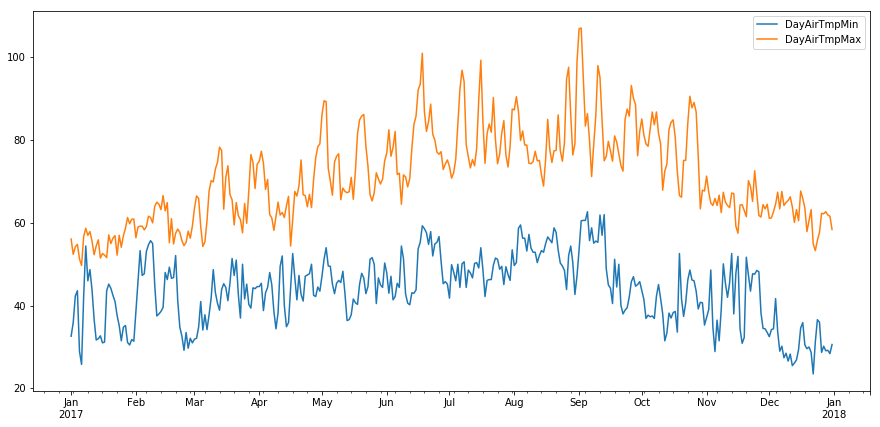

In [48]:
plot = df[['DayAirTmpMin', 'DayAirTmpMax']].plot(ax=ax)
fig = plot.get_figure()

## Making a dataset

In [38]:
# We need to take one type and range of dates
# make a dataframe
# make index date range
# return the dataset of a given datatype
def make_dataset(kind, start, end):
    df = weather_mulit_years(start, end)
    
    duration = pd.date_range(start, end, freq='D')
    
    
    dataset = pd.DataFrame(columns=['minTemp', 'maxTemp', 'Eto_values','DayPrecip','WindSpd','DaySolRad','rain','type','stage'])

    start = np.nan
    
    # going through the 4 types of wine (Sauvignon Blanc, Chardonnay, Merlot, and Cabernet Sauvignon)
    # for kind in set(df_stages['types']):
    DATA = {'Start': stages[stages['types'] == kind].index.tolist(),
           'Stages':[(i%4) for i in range(stages[stages['types']==1].shape[0])] # ['Bud', 'Bloom','Veraison', 'Harvest']
           }
    # dataframe with date index and value of stages
    dfs = pd.DataFrame(DATA).set_index('Start')
    
    
    # going through each date
    for i in duration.date:
        if i in df.index:
            entry = pd.DataFrame({'minTemp': df.loc[i,'DayAirTmpMin'],
                                 'maxTemp': df.loc[i,'DayAirTmpMax'],
                                  'Eto_values':df.loc[i,'Eto_values'],
                                  'DayPrecip': df.loc[i,'DayPrecip'],
                                  'WindSpd': df.loc[i,'DayWindSpdAvg'],
                                  'DaySolRad': df.loc[i,'DaySolRadAvg']
                                 }, index=[i])

        # adding rain 
        if(rain.loc[rain.index.month == i.month]['inches'].empty == True):
            entry['rain'] = 0.00
        else:
            entry['rain'] = rain.loc[rain.index.month == i.month]['inches'][0]

        # adding type
        entry['type'] = kind

        # adding stage
        if(i in dfs.index):
            entry['stage'] = dfs.loc[i][0]
            start = dfs.loc[i][0]           
        else:
            # check for the Harevest day 
            # if Harvest day has been recorded
            # no need to record the other dates
            if(start == np.int64(3)):
                start = np.nan
                entry['stage'] = start
            else:
                entry['stage'] = start

        dataset = dataset.append(entry, sort=False)

    return dataset
   

In [40]:
# for i in range(stages[stages['types']==1].shape[0]):
#     print((i%4)+1)

test = make_dataset(1,'2017-01-01', '2017-12-31')

# use

In [44]:
test[90:120]

,minTemp,maxTemp,Eto_values,DayPrecip,WindSpd,DaySolRad,rain,type,stage
2017-04-01,44.6,74.9,0.15,0.00,3.2,476.0,1.31,1,0.0
2017-04-02,45.4,77.3,0.13,0.00,2.3,459.0,1.31,1,0.0
2017-04-03,38.8,74.4,0.15,0.00,2.9,499.0,1.31,1,0.0
2017-04-04,43.1,68.1,0.11,0.00,2.6,399.0,1.31,1,0.0
2017-04-05,44.4,70.5,0.11,0.00,2.0,355.0,1.31,1,0.0
2017-04-06,48.0,62.0,0.04,1.00,4.7,135.0,1.31,1,0.0
2017-04-07,45.0,61.2,0.04,0.93,4.5,187.0,1.31,1,0.0
2017-04-08,38.6,58.2,0.09,0.19,2.9,433.0,1.31,1,0.0
2017-04-09,34.4,61.5,0.12,0.00,2.6,502.0,1.31,1,0.0
2017-04-10,38.3,65.0,0.10,0.00,2.5,405.0,1.31,1,0.0


#### pickleing 


In [ ]:
def save_data(data, name):
    path = "../data/"
    with open(path+"pkl/"+name+".pkl", 'wb') as f:
        pickle.dump(data, f)
        
    data.to_csv(path+'csv/'+name+'.csv',sep=",")
    

In [ ]:
# save_data(use,'2010to2017')

In [ ]:
# with open('../data/pkl/dataset.pkl', 'rb') as data:
#     dataset = pickle.load(data)

In [ ]:
df = pd.read_csv('../data/csv/2010to2017.csv')
df = df.set_index('index')

In [ ]:
# looking for unknow values
# use.isna().sum()

In [ ]:
%run ../script/cleanup.py

In [ ]:
dataset = cleanup(df)

In [ ]:
dataset

##### try to implement categorical binning 
#### Split the data into train and test

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
# the label can be the number of week
# and it can be a regression problem 

#### Also look at the overall statistics:

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("Harvest")
train_stats = train_stats.transpose()
train_stats

#### Split features from labels

In [ ]:
train_labels = train_dataset.pop('Harvest')
test_labels = test_dataset.pop('Harvest')

#### Normalize the data

In [ ]:
# def norm(x):
#     return (x - train_stats['mean'])/train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)
from sklearn import preprocessing
def standardize_data(df):
    
    X_scaled = preprocessing.scale(df[['minTemp', 'maxTemp', 'Eto_values','DayPrecip','WindSpd','DaySolRad',
                                       'rain','Month','Day', 'Bud', 'Bloom','Veraison']])
 
    X_scaled_df = pd.DataFrame(X_scaled, columns=['minTemp', 'maxTemp', 'Eto_values','DayPrecip','WindSpd','DaySolRad',
                                                  'rain','Month','Day','Bud','Bloom','Veraison'])
#     df_scale = pd.concat([X_scaled_df,
#                          df['Bud'], df['Bloom'], df['Veraison']],axis=1) # join='inner')

    return X_scaled_df
    

In [ ]:
df_train_scale = standardize_data(train_dataset)
df_test_scale = standardize_data(test_dataset)

In [ ]:
train_dataset.shape

In [ ]:
df_train_scale.shape

## Model

#### Build the model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(df_train_scale.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
             optimizer=optimizer,
             metrics=['mae','mse'])
    return model


In [ ]:
model = build_model()

In [ ]:
model.summary()

In [ ]:
example_batch = df_train_scale[:10]
example_result = model.predict(example_batch)
example_result

In [ ]:
# train_dataset.head()
df_train_scale[:10]

In [ ]:
train_labels[:10]

#### Train the model

In [ ]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [ ]:
EPOCHS = 1000
history = model.fit(
    df_train_scale, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Harverst]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,0.25])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Harverst^2]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,0.0625])

In [ ]:
plot_history(history)

In [ ]:
scores = model.evaluate(df_test_scale, test_labels)
print("Accuracy: %.2f%%"%(scores[1]*100))

In [ ]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(df_train_scale,train_labels, epochs=EPOCHS, validation_split= 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(df_test_scale, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} Haverst".format(mae))
print("Testing set Mean square Error: {:5.2f} Haverst".format(mse))
print("Testing set loss: {:5.2f} Haverst".format(loss))
scores = model.evaluate(df_test_scale, test_labels)
print("Accuracy: %.2f%%"%(scores[1]*100))

## Make Predictions

In [ ]:
test_predictions = model.predict(df_test_scale).flatten()
test_predictions

In [ ]:
test_labels.size

In [ ]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Harvest]')
plt.ylabel('Predictions [Harvest]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-10,10], [-10,10])

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Harvest]")
_ = plt.ylabel('Count')